# Instructional Materials

## Introduction

The purpose of this module is to demonstrate how to use computational methods to work with Open Civic Data to answer a data driven question [TODO: reference to previous module]

There are many ways you can use computation to manipulate data. Spreadsheet applications like Microsoft Excel or Google Sheets are popular because of their ease of use.

In this module, we are going to demonstrate how to work with open civic data using the Python programming language.

*Why Python?* By using a programming language we can *show our work* by writing code to perform data manipulations, rather than interacting with a graphical user interfaces.

One of the key things to understand is we are *programming for insight* rather than writing a program to create software.


## Data Driven Question

In this module we are going to answer the question: What neighborhood in Pittsburgh uses the most Wifi at a Public Library?

To fully answer this question we are going to need to work with three datasets:
- [CLP Public Wifi](https://data.wprdc.org/dataset/clp-public-wifi)
- [CLP Library Locations](https://data.wprdc.org/dataset/libraries)
- [Pittsburgh Neighborhoods](https://data.wprdc.org/dataset/neighborhoods2)

Answering this question requires the following manipulations:
  - **Joining** - If we look at the CLP Public Wifi data, the dataset has no information about neighborhoods. We need to enrich the data with additional information about neighborhoods by *joining* it to other datasets.
  - **Aggregation** - Each datapoint of the CLP Public Wifi data represents an individual session. There are a lot of sessions! The data needs to be aggregated to be more comprehensible. This requires some kind of mathematical operation to combine the datapoints together.

## Downloading the CLP Public Wifi Data

As discussed in [Module 3.5: File Formats for Open Civic Data](https://civic-switchboard.gitbook.io/education-series/segment-3-preparing-libraries-for-sharing-their-data/module-3.5-file-formats-for-open-civic-data), it is important for the data to be downloadable in an open, machine-readable format. The WPRDC provides the CLP Public Wifi data a variety of file formats.
* CSV - Comma Separated Values
* TSV - Tab Separated Values
* JSON - JavaScript Object Notation
* XML - eXtensible Markup Language

In each of these different files the data is the same, but the way it is structured is different. CSV is the most common format for saving tabular data as a file.

If you click and download the CLP Public Wifi as CSV you should note, the default filename is a very confusing string of numbers and letters, `20843d56-506f-44b1-83df-5b16ee865783.csv` This is an automatically generated filename by the WPRDC database, but we are going to rename the file `clp-public-wifi.csv` to make it easier to use.

The data file has already been downloaded and placed next to the notebook

## Loading the Data

When we download the CLP Public Wifi data to our local computer, this gives us the ability to open and work with the dataset in whatever applications that are installed in our computer. Often the default application for working with tabular data in CSV files is Microsoft Excel. In our case, we will be using the Python programming language to open and manipulate the data file.

Loading Pandas is like opening the Excel application on our computer.

In [1]:
# load the Python libraries for working with data
import pandas

Now we can use the pandas `read_csv` function to load the data from our hard drive into memory so it can be manipulated with Python code. When we load the data in Python we need to assign the data to a variable, in this case we use a variable called `wifi_data`.

If we were using Excel, this would be like opening the CSV file.

In [2]:
# read the csv and save the data in a variable called wifi_data
wifi_data = pandas.read_csv("clp-public-wifi.csv")

It worked! But we don't see anything!? Working with data in Python is a bit different then using a graphical interface like Excel. With Python all of our interactions are text based commands rather than clicking with the mouse. So if we want to see the data we need to tell Python we want to look at it.

Using the `head` function we can tell Python to display the top or "head" of the tabular dataset. The default is five rows.

In [3]:
# display the first 5 rows of the data
wifi_data.head()

,CLPID,Name,Year,Month,WifiSessions,WifiMinutes
0,CLP01,ALLEGHENY LIBRARY,2016,1,1037,148513
1,CLP01,ALLEGHENY LIBRARY,2016,2,1064,150948
2,CLP01,ALLEGHENY LIBRARY,2016,3,949,129484
3,CLP01,ALLEGHENY LIBRARY,2016,4,934,136196
4,CLP01,ALLEGHENY LIBRARY,2016,5,1018,135793


Usually, you don't want to display every row in a dataset because many datasets are so large they will overflow your screen! If we want to get a sense of the size of our dataset, we can use the `len()` function to determine the "length" (number of rows) in our data.

In [4]:
# return the number of rows in the data
len(wifi_data)

532

This output is simply a number and fortunately this matches up with what the data looked like when we looked at it on the [WPRDC website](https://data.wprdc.org/dataset/clp-public-wifi), 532 rows.

## Answering Data Driven Questions

Now that the data has been loaded into Python with Pandas, we are able to perform calculations to learn more about the data. Even with this dataset we can begin to learn a bit about wifi usage at the Carnegie Libraries of Pittsburgh.

## Total WiFi Minutes

For example, what is the total usage of wifi minutes at all CLP locations? To answer this question, we can add together all of the values in the `WifiMinutes` column in the data. This *sum* will represent the total number of minutes the wifi has been used at all CLP locations over the period of time represented by the dataset.

In [5]:
# compute the sum of the WifiMinutes column
wifi_data["WifiMinutes"].sum()

114514102

That's a lot of minutes! How many hours, days, years would that be? To answer this question, we must take that total number of minutes and perform a series of mathematical calculations to determine hours, days, and years.

In [6]:
# compute total minutes and save in a variable
total_minutes = wifi_data["WifiMinutes"].sum()

# compute the number of hours
total_hours = total_minutes / 60
print("Total Hours:", total_hours)

# compute the number of days
total_days = total_hours / 24
print("Total Days:", total_days)

# compute the number of years
total_years = total_days / 365
print("Total Years:", total_years)

Total Hours: 1908568.3666666667
Total Days: 79523.68194444444
Total Years: 217.873101217656


WOW! That is a lot of years! Over 200!? That seems like a lot. Remember, this number represents the cumulative amount of time people have been using the internet at all of the CLP library locations.

This leads to another question, how many people have been using the public Wifi at CLP? How much time do they spend on the internet?

In [7]:
# compute the total number of wifi sessions by calculating the sum of the WifiSessions column
wifi_data["WifiSessions"].sum()

863530

So this number tells us how many times someone connected to the public Wifi. With this information we could get a sense of how long people are using the internet every time they connect.

In [8]:
# compute the total sessions and save to a variable
total_sessions = wifi_data["WifiSessions"].sum()

# compute the average number of minutes for teach session
total_minutes / total_sessions

132.61160816647944

So this means, on average, people used the wireless internet for about two hours and 12 minutes.

## Recreating the WPRDC Chart

If you visit the [CLP Public Wifi](https://data.wprdc.org/dataset/clp-public-wifi) web page, you will see a shart showing Wifi usage for 2017. We can recreate that chart using Python!

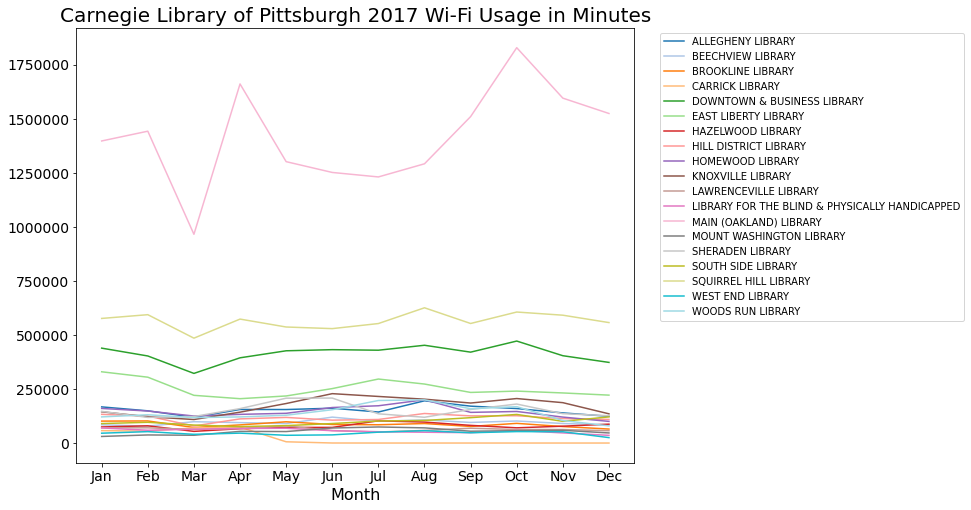

In [9]:
# Specify the year in a variable
year = 2017

# Select data for specified year, group by library/month, and aggregate by the adding together the minutes
wifi_data_subset = wifi_data[wifi_data['Year'] == year].groupby(["Name", "Month"], as_index=False)["WifiMinutes"].sum()

# Reshape the data so it is easier to plot by Month
reshaped_wifi_data_subset = wifi_data_subset.pivot_table(index="Month", columns="Name", values="WifiMinutes")

# plot the data
ax = reshaped_wifi_data_subset.plot(figsize=(10,8),
                                  title=f"Carnegie Library of Pittsburgh {year} Wi-Fi Usage in Minutes",
                                  colormap="tab20",
                                  fontsize=14)
# clean up the text
ax.xaxis.label.set_size(16)
ax.title.set_size(20)
ax.legend(loc="upper right", bbox_to_anchor=(1.6,1))
ax.ticklabel_format(style="plain")

# add the Month abreviations instead of numbers
ax.set_xticks(ticks=range(1,13),labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul","Aug","Sep","Oct","Nov","Dec"]);


TODO: Explain what the code did above

## *Activity*

Modify the code below to create a chart for 2016 and 2018.

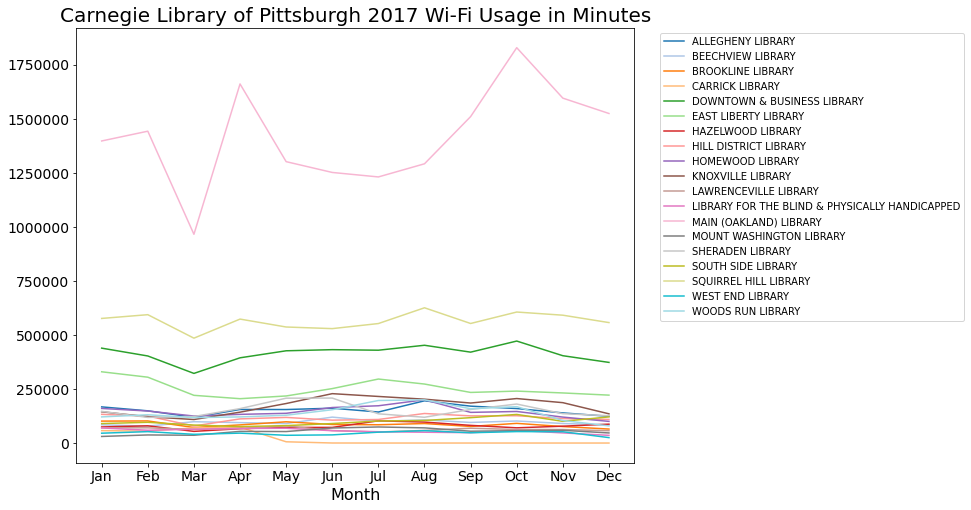

In [10]:
# Specify the year in a variable
year = 2017

# Select data for specified year, group by library/month, and aggregate by the adding together the minutes
wifi_data_subset = wifi_data[wifi_data['Year'] == year].groupby(["Name", "Month"], as_index=False)["WifiMinutes"].sum()

# Reshape the data so it is easier to plot by Month
reshaped_wifi_data_subset = wifi_data_subset.pivot_table(index="Month", columns="Name", values="WifiMinutes")

# plot the data
ax = reshaped_wifi_data_subset.plot(figsize=(10,8),
                                    title=f"Carnegie Library of Pittsburgh {year} Wi-Fi Usage in Minutes",
                                    colormap="tab20",
                                    fontsize=14)
# clean up the text
ax.xaxis.label.set_size(16)
ax.title.set_size(20)
ax.legend(loc="upper right", bbox_to_anchor=(1.6,1))
ax.ticklabel_format(style="plain")

# add the Month abreviations instead of numbers
ax.set_xticks(ticks=range(1,13),labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul","Aug","Sep","Oct","Nov","Dec"]);

What do we see about these other charts? Are there meaningful differences in the different years? What is happening in the 2018 data? What do you think that means?

## Summary

TODO

## Joining Datasets Together

To answer our motivating question, *What neighborhood uses the most WiFi?*, we need additional data. As we have seen above, there is no neighborhood information in the CLP Public WiFi data. In fact, there is very little information about any of the libraries.

Fortunately, the Carnegie Library of Pittsburgh has posted another dataset on the WPRDC that has a bunch of information about each library location.

The [Library Locations](https://data.wprdc.org/dataset/libraries) dataset includes a bunch of information about each CLP branch including "address, phone number, square footage, and standard operating hours." Unfortunately, it does not include is neighborhood information, but it does have GPS locations for library!

The WPRDC hosts another dataset, [Pittsburgh Neighborhoods](https://data.wprdc.org/dataset/neighborhoods2), which is a geographic dataset representing the spatial area of each of the 90 neighborhoods in Pittsburgh. What is useful about this dataset is that you can use computational methods to determine in which spatial area a particula GPS coordinate resides. What this means is we can use the GPS data from the library locations dataset and programmatically determine the neighborhood for each library location.

By performing these computations we can add a new column to the library locations dataset that includes the neighborhood name. In this way we are **joining** two datasets together to enrich one of the datasets with information from the other.

## Downloading the Library Locations

The WPRDC also hosts a [Library Locations](https://data.wprdc.org/dataset/libraries/resource/14babf3f-4932-4828-8b49-3c9a03bae6d0?view_id=f34cd02e-17eb-40aa-8f86-ae51968db84a) dataset that includes a bunch of information about each of the libraries in the CLP system.

This dataset has 19 entries for each of the 19 libraries. For each library, we have the following pieces of information:

- CLPID
- Name
- Address
- City
- Zip4
- County
- Phone
- SqFt
- The opening times for each day of the week
- The closing times for each day of the week
- Latitude
- Longitude

Most of the data in this dataset is location information for each of the locations, but it also includes some information about the library itself, namely how big and when it is open.

In [11]:
# load the library locations dataset into the variable library_data
library_data = pandas.read_csv("clp-library-locations.csv")

In [12]:
# display the first five rows of the library location data
library_data.head()

,CLPID,Name,Address,City,State,Zip4,County,Phone,SqFt,MoOpen,...,ThOpen,ThClose,FrOpen,FrClose,SaOpen,SaClose,SuOpen,SuClose,Lat,Lon
0,CLP01,ALLEGHENY LIBRARY,1230 FEDERAL ST,PITTSBURGH,PA,15212-4704,Allegheny,(412) 237-1890,15005,10:00:00,...,10:00:00,20:00:00,10:00:00,17:00:00,10:00:00,17:00:00,12:00:00,17:00:00,40.456392,-80.006613
1,CLP02,BEECHVIEW LIBRARY,1910 BROADWAY AVE,PITTSBURGH,PA,15216-3130,Allegheny,(412) 563-2900,8000,10:00:00,...,10:00:00,20:00:00,10:00:00,17:00:00,10:00:00,17:00:00,NaN,NaN,40.407026,-80.027741
2,CLP03,BROOKLINE LIBRARY,708 BROOKLINE BLVD,PITTSBURGH,PA,15226-2102,Allegheny,(412) 561-1003,12651,10:00:00,...,10:00:00,20:00:00,10:00:00,17:00:00,10:00:00,17:00:00,NaN,NaN,40.394399,-80.021427
3,CLP04,CARRICK LIBRARY,1811 BROWNSVILLE RD,PITTSBURGH,PA,15210-3907,Allegheny,(412) 882-3897,4000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.397019,-79.987547
4,CLP05,DOWNTOWN & BUSINESS LIBRARY,612 SMITHFIELD ST,PITTSBURGH,PA,15222-2506,Allegheny,(412) 281-7141,12709,08:30:00,...,08:30:00,18:00:00,08:30:00,17:00:00,10:00:00,17:00:00,NaN,NaN,40.441749,-79.997112


## Finding out Neighborhoods

Unfortunately, the library location information is missing a vital piece of information we need: neighborhoods!

If we want to obtain neighborhood information for each library, we could spend some time and manually look up it up for each of the 19 locations. But we can also use Python programming to automate the process of looking up each library location and determining the neighborhood. To do this we will use the GPS location of each library location and look it up in a geographic dataset of Pittsburgh's neighborhoods.

## Downloading the Neighborhood Data

* WPRDC publishes a dataset of Pittsburgh Neighborhoods.
* [Pittsburgh Neighborhoods](https://data.wprdc.org/dataset/neighborhoods2)
* This is a *geographic* dataset which means it requires some special Python libraries for opening and working with the data

We need 3rd party library called [shapely](http://shapely.readthedocs.io) which will be used to encode GPS coordinates into geographic points. Then we will use the [Geopandas](https://geopandas.org/en/stable/) library to perform joining operations to determine the neighborhood for each GPS coordinate.

In [13]:
# load up the necessary geographic libraries
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from numpy import nan

## Loading Data

You need to have a geographic dataset that represents the units of interest. In the current directory is a [geojson](https://en.wikipedia.org/wiki/GeoJSON) file, `neighborhoods.geojson` that encodes all the neighborhoods in Pittsburgh. If you want to data analysis and visualization with neighborhoods, you should copy this file to your workspace.

In [14]:
# read the neighborhood geojson file
pgh_neighborhoods = gpd.read_file("neighborhoods.geojson")

## Looking at Geographic Data

Geopandas gives Python the ability to understand and process geographic datasets. This means we can perform *join* and *aggregation* operations on the data, like we did above with the CLP Wifi Data.

In [15]:
# take a peak at what these data look like
pgh_neighborhoods

,objectid,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,page_number,plannerassign,created_user,created_date,last_edited_user,last_edited_date,temp,Shape__Area,Shape__Length,geometry
0,1293,201,42,003,980600,1,420039806001,Block Group 1,G5030,S,...,15,Stephanie Joy Everett,pgh.admin,2020-08-14 14:52:26.925,pgh.admin,2020-08-14 14:52:26.925,None,1.068796e+07,19600.573085,"POLYGON ((-80.02999 40.45909, -80.02989 40.458..."
1,1294,10,42,003,261200,1,420032612001,Block Group 1,G5030,S,...,15,Stephanie Joy Everett,pgh.admin,2020-08-14 14:52:26.925,pgh.admin,2020-08-14 14:52:26.925,None,1.133208e+07,21174.473326,"POLYGON ((-80.01078 40.49975, -80.01073 40.499..."
2,1295,11,42,003,260900,1,420032609001,Block Group 1,G5030,S,...,15,Stephanie Joy Everett,pgh.admin,2020-08-14 14:52:26.925,pgh.admin,2020-08-14 14:52:26.925,None,8.743618e+06,13811.917169,"POLYGON ((-80.00327 40.48271, -80.00325 40.482..."
3,1296,7,42,003,262000,1,420032620001,Block Group 1,G5030,S,...,15,Stephanie Joy Everett,pgh.admin,2020-08-14 14:52:26.925,pgh.admin,2020-08-14 14:52:26.925,None,1.754935e+07,18197.745741,"POLYGON ((-79.99761 40.47460, -79.99761 40.474..."
4,1297,8,42,003,261500,1,420032615001,Block Group 1,G5030,S,...,15,Stephanie Joy Everett,pgh.admin,2020-08-14 14:52:26.925,pgh.admin,2020-08-14 14:52:26.925,None,2.522420e+07,26390.549314,"POLYGON ((-80.01422 40.47745, -80.01435 40.477..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,1378,251,42,003,320400,3,420033204003,Block Group 3,G5030,S,...,15,Sophia Robison,pgh.admin,2020-08-14 14:52:26.925,pgh.admin,2020-08-14 14:52:26.925,None,2.338689e+07,31964.844864,"POLYGON ((-79.99633 40.39458, -79.99630 40.394..."
86,1379,265,42,003,563000,4,420035630004,Block Group 4,G5030,S,...,15,Sophia Robison,pgh.admin,2020-08-14 14:52:26.925,pgh.admin,2020-08-14 14:52:26.925,None,3.683820e+06,9978.225999,"POLYGON ((-80.06919 40.46046, -80.06912 40.460..."
87,1380,358,42,003,562500,1,420035625001,Block Group 1,G5030,S,...,15,Sophia Robison,pgh.admin,2020-08-14 14:52:26.925,pgh.admin,2020-08-14 14:52:26.925,None,6.425358e+06,25260.814467,"POLYGON ((-80.05154 40.46364, -80.05140 40.463..."
88,1381,298,42,003,563100,3,420035631003,Block Group 3,G5030,S,...,15,Sophia Robison,pgh.admin,2020-08-14 14:52:26.925,pgh.admin,2020-08-14 14:52:26.925,None,1.027920e+07,16308.247349,"POLYGON ((-80.03431 40.43366, -80.03424 40.433..."


The most common way to visualize geographic data is to make maps. The visualization below is just another representation of the neighborhoods' data. Note, the color is being used only to signify a different neighborhood, it doesn't have any particular value.

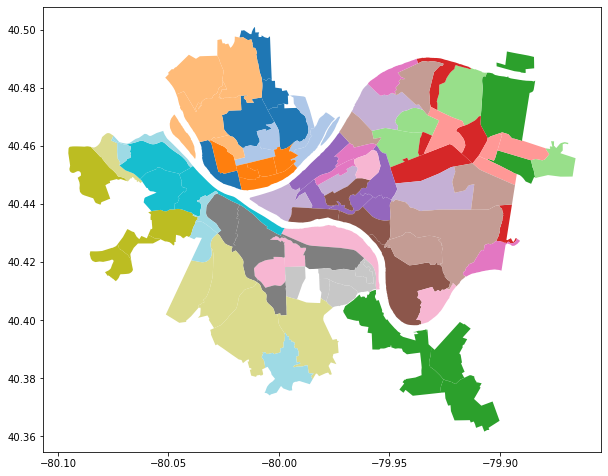

In [16]:
# plot the map using standard pandas plotting functions
pgh_neighborhoods.plot(figsize=(10,10), cmap="tab20"); #add semicolon to prevent ugly output

## Joining the Library Locations and Neighborhoods datasets

Pandas has a lot of handy built-in functions, but it does not include a function that can perform the geographic query we demonstrated above. Instead, what we need to do is use a special dataframe function, `apply()` that allows us to create our own custom function that will be *applied* to every row of the data. Apply is kinda like using a `for` loop over every row of your dataframe, but it operates a bit faster.

We need to create a python function that does the following:
* Take a row as an input parameter
* Convert the latitude and longitude columns of that row to a single "Point" object
* Perform a lookup in the pgh_neighborhoods data to see if that Point/Tree exists
* Return the name of the neighborhood if it exists or return `NaN`

The function should be written as if it were inside a for loop that iterated over each row of the data, but `apply()` will handle all the looping by calling our function repeatedly and pass each row as a parameter to the function. This is preferable to looping looping over the datafarme in vanilla python because Pandas.

What `apply()` will then return is a new Series of neighborhood names derived from the geolocation code. Then we can compare this list of neighborhoods with the actual neighborhood values in the tree data to see if it worked properly.

In [17]:
# create a function that we will supply to apply
def reverse_geolocate_neighborhood(row):
    """Given a row, grab the latitude and longitude columns and
    return the neighborhood name (or nan for locations outside the dataset)."""

    # get the latitude and longitude
    latitude = float(row['Lat'])
    longitude = float(row['Lon'])

    # create a shapely point from the GPS coordinates
    location = Point(longitude, latitude)

    # make a query mask and query the data on that location
    location_query = pgh_neighborhoods['geometry'].contains(location)
    result = pgh_neighborhoods[location_query]

    # if the location isn't in dataset it will be empty
    if result.empty:
        # location isn't within Pittsburgh, return not-a-number
        return nan
    else:
        # return a string of the "hood" where the point was located
        return result.iloc[0]['hood']

Now we can give our `reverse_goelocate_neighborhood` function as a parameter to the [dataframe apply](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html) function and Pandas process every row of the data using our custom function. This will create a new Pandas series with all the neighborhood names.



**THIS CELL WILL TAKE A LONG TIME TO RUN BECAUSE IT IS CRUNCHING ALL THE DATA**

In [18]:
# perform reverse geocoding with every row in the library data
# save results as a new column in our tree dataframe
library_data['neighborhood'] = library_data.apply(reverse_geolocate_neighborhood, axis=1)

# display the update librar data
library_data

,CLPID,Name,Address,City,State,Zip4,County,Phone,SqFt,MoOpen,...,ThClose,FrOpen,FrClose,SaOpen,SaClose,SuOpen,SuClose,Lat,Lon,neighborhood
0,CLP01,ALLEGHENY LIBRARY,1230 FEDERAL ST,PITTSBURGH,PA,15212-4704,Allegheny,(412) 237-1890,15005,10:00:00,...,20:00:00,10:00:00,17:00:00,10:00:00,17:00:00,12:00:00,17:00:00,40.456392,-80.006613,Central Northside
1,CLP02,BEECHVIEW LIBRARY,1910 BROADWAY AVE,PITTSBURGH,PA,15216-3130,Allegheny,(412) 563-2900,8000,10:00:00,...,20:00:00,10:00:00,17:00:00,10:00:00,17:00:00,NaN,NaN,40.407026,-80.027741,Beechview
2,CLP03,BROOKLINE LIBRARY,708 BROOKLINE BLVD,PITTSBURGH,PA,15226-2102,Allegheny,(412) 561-1003,12651,10:00:00,...,20:00:00,10:00:00,17:00:00,10:00:00,17:00:00,NaN,NaN,40.394399,-80.021427,Brookline
3,CLP04,CARRICK LIBRARY,1811 BROWNSVILLE RD,PITTSBURGH,PA,15210-3907,Allegheny,(412) 882-3897,4000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.397019,-79.987547,Carrick
4,CLP05,DOWNTOWN & BUSINESS LIBRARY,612 SMITHFIELD ST,PITTSBURGH,PA,15222-2506,Allegheny,(412) 281-7141,12709,08:30:00,...,18:00:00,08:30:00,17:00:00,10:00:00,17:00:00,NaN,NaN,40.441749,-79.997112,Central Business District
5,CLP06,EAST LIBERTY LIBRARY,130 SOUTH WHITFIELD ST,PITTSBURGH,PA,15206-3806,Allegheny,(412) 363-8232,40000,10:00:00,...,20:00:00,10:00:00,17:00:00,10:00:00,17:00:00,NaN,NaN,40.460963,-79.926502,East Liberty
6,CLP07,HAZELWOOD LIBRARY,5006 SECOND AVE,PITTSBURGH,PA,15207-1625,Allegheny,(412) 421-2517,7000,10:00:00,...,20:00:00,10:00:00,17:00:00,10:00:00,17:00:00,NaN,NaN,40.409805,-79.943849,Hazelwood
7,CLP08,HILL DISTRICT LIBRARY,2177 CENTRE AVE,PITTSBURGH,PA,15219-6316,Allegheny,(412) 281-3753,8333,10:00:00,...,17:00:00,10:00:00,17:00:00,10:00:00,17:00:00,NaN,NaN,40.445471,-79.976706,Middle Hill
8,CLP09,HOMEWOOD LIBRARY,7101 HAMILTON AVE,PITTSBURGH,PA,15208-2847,Allegheny,(412) 731-3080,28776,10:00:00,...,20:00:00,10:00:00,17:00:00,10:00:00,17:00:00,NaN,NaN,40.455284,-79.899213,Homewood South
9,CLP10,KNOXVILLE LIBRARY,400 BROWNSVILLE RD,PITTSBURGH,PA,15210-2251,Allegheny,(412) 381-6543,6700,10:00:00,...,17:00:00,10:00:00,17:00:00,10:00:00,17:00:00,NaN,NaN,40.413186,-79.989149,Knoxville


Neat! Now we have added a neighborhood column to the Library Locations dataset.

In [19]:
# select just the name and neighborhood columns from the library data
library_data[["Name", "neighborhood"]]

,Name,neighborhood
0,ALLEGHENY LIBRARY,Central Northside
1,BEECHVIEW LIBRARY,Beechview
2,BROOKLINE LIBRARY,Brookline
3,CARRICK LIBRARY,Carrick
4,DOWNTOWN & BUSINESS LIBRARY,Central Business District
5,EAST LIBERTY LIBRARY,East Liberty
6,HAZELWOOD LIBRARY,Hazelwood
7,HILL DISTRICT LIBRARY,Middle Hill
8,HOMEWOOD LIBRARY,Homewood South
9,KNOXVILLE LIBRARY,Knoxville


Now that we have added neighborhood information to our library location data, now what we need to do is connect the library location data with the public wifi data.

## Joining the Library Locations and Public Wifi Data

We now have all of the information we need to answer the question, what neighborhood uses the most Wifi in Pittsburgh. However, the data we need to answer this question is in two separate datasets. What we need to do is *join* the data together.

In [135]:
# look at the public wifi data
wifi_data.head(2)

,CLPID,Name,Year,Month,WifiSessions,WifiMinutes
0,CLP01,ALLEGHENY LIBRARY,2016,1,1037,148513
1,CLP01,ALLEGHENY LIBRARY,2016,2,1064,150948


In [134]:
# look at the library data
library_data.head(2)

,CLPID,Name,Address,City,State,Zip4,County,Phone,SqFt,MoOpen,...,ThClose,FrOpen,FrClose,SaOpen,SaClose,SuOpen,SuClose,Lat,Lon,neighborhood
0,CLP01,ALLEGHENY LIBRARY,1230 FEDERAL ST,PITTSBURGH,PA,15212-4704,Allegheny,(412) 237-1890,15005,10:00:00,...,20:00:00,10:00:00,17:00:00,10:00:00,17:00:00,12:00:00,17:00:00,40.456392,-80.006613,Central Northside
1,CLP02,BEECHVIEW LIBRARY,1910 BROADWAY AVE,PITTSBURGH,PA,15216-3130,Allegheny,(412) 563-2900,8000,10:00:00,...,20:00:00,10:00:00,17:00:00,10:00:00,17:00:00,NaN,NaN,40.407026,-80.027741,Beechview


When joining together two separate datasets, you need to consider several factors. First, are there any shared columns, that is, are there data that are the same in both datasets. For the Wifi and Library locations data we can see there are two shared columns: `CLPID` and `Name`. The data values in both of these columns are exactly the same which means we can match rows from one dataset with rows from another dataset by joining on the data values in these columns. However, there is another important factor to consider when joining data together. What is the relationship between the entity each row represents in the datasets.

- one to one : Rows in both datasets represent the same thing
- Many to one (or one to many): Entities in one dataset correspond to only one row in the other dataset.
- Many to Many: Multiple rows in one dataset correspond to multiple rows in the other dataset.


In our case, we have a many to one relationship between the wifi data and the library locations data. Each row in the public wifi data corresponds to the amount of wifi usage at a particular library location in a particular month. Given that the dataset spans from January of 2016 to April of 2018, 28 months, that means there are 28 rows in the public wifi data that correspond to 1 row in the library locations data.

**TODO: Explain GroupBy. What is the problem we are having and why does Groupby solve that problem**

In [139]:
# create new dataset of total wifi usage per library
wifi_data_per_library = wifi_data.groupby("Name",as_index=False)[["WifiSessions", "WifiMinutes"]].sum()
wifi_data_per_library

,Name,WifiSessions,WifiMinutes
0,ALLEGHENY LIBRARY,40010,4401158
1,BEECHVIEW LIBRARY,17319,2349743
2,BROOKLINE LIBRARY,18266,2461372
3,CARRICK LIBRARY,6430,987890
4,DOWNTOWN & BUSINESS LIBRARY,100802,11912027
5,EAST LIBERTY LIBRARY,60562,7372306
6,HAZELWOOD LIBRARY,18804,2435891
7,HILL DISTRICT LIBRARY,24522,2893996
8,HOMEWOOD LIBRARY,29618,3960604
9,KNOXVILLE LIBRARY,26174,3356824


In [142]:
# join together the library data with the public wifi data
wifi_per_neighborhood = pandas.merge(wifi_data_per_library, library_data[["Name","neighborhood"]])
wifi_per_neighborhood

,Name,WifiSessions,WifiMinutes,neighborhood
0,ALLEGHENY LIBRARY,40010,4401158,Central Northside
1,BEECHVIEW LIBRARY,17319,2349743,Beechview
2,BROOKLINE LIBRARY,18266,2461372,Brookline
3,CARRICK LIBRARY,6430,987890,Carrick
4,DOWNTOWN & BUSINESS LIBRARY,100802,11912027,Central Business District
5,EAST LIBERTY LIBRARY,60562,7372306,East Liberty
6,HAZELWOOD LIBRARY,18804,2435891,Hazelwood
7,HILL DISTRICT LIBRARY,24522,2893996,Middle Hill
8,HOMEWOOD LIBRARY,29618,3960604,Homewood South
9,KNOXVILLE LIBRARY,26174,3356824,Knoxville


In [144]:
# sort data by WifiMinutes
wifi_per_neighborhood.sort_values("WifiMinutes", ascending=False)

,Name,WifiSessions,WifiMinutes,neighborhood
12,MAIN (OAKLAND) LIBRARY,296258,40557804,North Oakland
16,SQUIRREL HILL LIBRARY,121232,16436638,Squirrel Hill North
4,DOWNTOWN & BUSINESS LIBRARY,100802,11912027,Central Business District
5,EAST LIBERTY LIBRARY,60562,7372306,East Liberty
0,ALLEGHENY LIBRARY,40010,4401158,Central Northside
8,HOMEWOOD LIBRARY,29618,3960604,Homewood South
14,SHERADEN LIBRARY,23757,3525389,Sheraden
9,KNOXVILLE LIBRARY,26174,3356824,Knoxville
18,WOODS RUN LIBRARY,23103,3262051,Marshall-Shadeland
15,SOUTH SIDE LIBRARY,20840,2928382,South Side Flats
